## Loading and splitting the data 

In [18]:
import numpy as np
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
DATASET_PATH = "data.json"
def load_data(dataset_path):
    with open(dataset_path, "r") as file:
        data = json.load(file)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    print("Data succesfully loaded!")

    return  X, y
    
if __name__ == "__main__":
    X, y = load_data(DATASET_PATH)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    

Data succesfully loaded!


## Building the network architecture with keras

In [44]:
keras.backend.clear_session()
model = keras.Sequential([
    # input layer
    # [1] = interval and [2] = values of mfcc for that interval
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    #hidden layers

    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(epsilon=0.001),
    
    keras.layers.Dense(64, activation="relu"),
    #output layer
    keras.layers.Dense(10, activation="softmax")
])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

## Compile and train the network

In [46]:
optimiser = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

In [49]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), batch_size=32, epochs=100, callbacks=[es_callback])

Train on 692 samples, validate on 297 samples
Epoch 1/100
692/692 [==============================] - 0s 368us/sample - loss: 1.0488 - accuracy: 0.7818 - val_loss: 1.1714 - val_accuracy: 0.7576
Epoch 2/100
692/692 [==============================] - 0s 353us/sample - loss: 1.0466 - accuracy: 0.7861 - val_loss: 1.0620 - val_accuracy: 0.8114
Epoch 3/100
692/692 [==============================] - 0s 361us/sample - loss: 1.0452 - accuracy: 0.7962 - val_loss: 1.1284 - val_accuracy: 0.7744
Epoch 4/100
692/692 [==============================] - 0s 364us/sample - loss: 1.0135 - accuracy: 0.7948 - val_loss: 1.0829 - val_accuracy: 0.7879
Epoch 5/100
692/692 [==============================] - 0s 376us/sample - loss: 1.0103 - accuracy: 0.8035 - val_loss: 1.1101 - val_accuracy: 0.7744
Epoch 6/100
692/692 [==============================] - 0s 412us/sample - loss: 0.9990 - accuracy: 0.8121 - val_loss: 1.0718 - val_accuracy: 0.7811
Epoch 7/100
692/692 [==============================] - 0s 355us/sample -

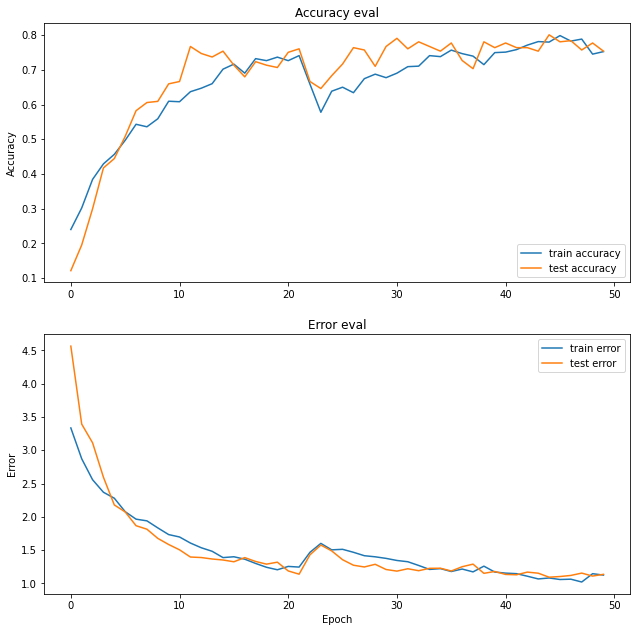

In [48]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    fig.set_size_inches(10.5, 10.5, forward=True)

    plt.show()
plot_history(history)